In [1]:
import pandas as pd
import re
import string
import numpy as np

In [2]:
data = pd.read_csv("Total_Lyrics.csv", index_col=0)
data.columns = ['title', 'artist', 'rank', 'date', 'lyrics']
#data['lyrics'] = ['\n'.join(eval(l)) for l in data['lyrics']]
data.head()

,title,artist,rank,date,lyrics
0,What About Us,The Coasters,50,1960-01-04,"[""He's got a house made of glass"", 'Got his ow..."
1,Riverboat,Faron Young,87,1960-01-04,"['Well, I spent the better part of my life', '..."
2,Little Things Mean A Lot,Joni James,86,1960-01-04,"['Blow me a kiss from across the room', ""Say I..."
3,The Little Drummer Boy,Johnny Cash,85,1960-01-04,"[Verse]\nCome, they told me\nOur newborn King ..."
4,Tracy's Theme,Spencer Ross,84,1960-01-04,NaN


In [3]:
df = pd.read_csv('Lyrics_From_Kaggle.csv', header = None)
df.columns = ['title', 'artist', 'lyrics']

In [4]:
data = data.merge(df, how = 'left', left_on=['title', 'artist'], right_on = ['title', 'artist'])
data['final_lyrics'] = data['lyrics_x'].fillna('') + data['lyrics_y'].fillna('')

In [6]:
data['final_lyrics'].replace('', np.nan, inplace=True)

In [7]:
print("Some examples of the songs that don't have lyrics sorted by most")
data = data.sort_values(by = 'date')
sort = data[data['final_lyrics'].isna()].groupby(['title', 'artist']).count()

n = 200
top = sort.sort_values(by = 'rank', ascending = False)[:n]
print(top['rank'].sum()/sort['rank'].sum())
top.head(200)

Some examples of the songs that don't have lyrics sorted by most
0.09317134856833167


,,rank,date,lyrics_x,lyrics_y,final_lyrics
title,artist,,,,,
Sukiyaki,4PM,16,16,0,0,0
Savage Love (Laxed - Siren Beat),Jawsh 685 x Jason Derulo,15,15,0,0,0
Work It,"Missy ""Misdemeanor"" Elliott",13,13,0,0,0
Never On Sunday,Don Costa And His Orchestra And Chorus,13,13,0,0,0
One Minute Man,"Missy ""Misdemeanor"" Elliott",11,11,0,0,0
...,...,...,...,...,...,...
Valentine,Martina McBride With Jim Brickman,10,10,0,0,0
Shake,Ying Yang Twins Featuring Pitbull,10,10,0,0,0
Shake That Monkey,Too Short Featuring Lil Jon & The East Side Boyz,10,10,0,0,0


In [8]:
(data['final_lyrics'].isna().sum())/len(data)

0.13339116709740773

In [9]:
later_dates = data[data['date'] > '1980']
len(data[data['final_lyrics'].isna()])/len(data)
len(later_dates[later_dates['final_lyrics'].isna()])/len(later_dates)

0.08839581517000872

### How many songs by month/year?

<Axes: xlabel='date'>

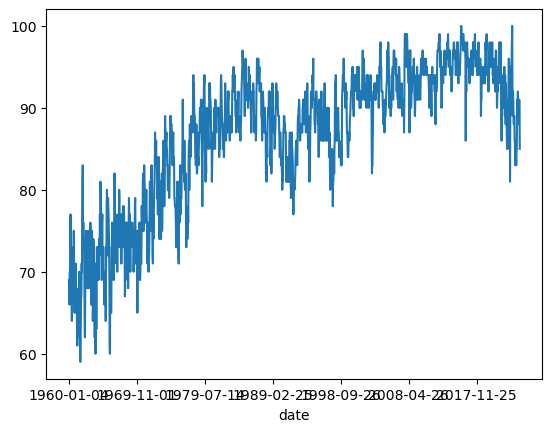

In [10]:
data.groupby('date').count()['final_lyrics'].plot()

### Clean Up Lyrics

In [11]:
import nltk

In [134]:
unique_songs = data.drop_duplicates(keep = 'first', subset = ['title', 'artist'])
unique_songs

,title,artist,rank,date,lyrics_x,lyrics_y,final_lyrics
0,What About Us,The Coasters,50,1960-01-04,"[""He's got a house made of glass"", 'Got his ow...",NaN,"[""He's got a house made of glass"", 'Got his ow..."
72,Swingin' On A Rainbow,Frankie Avalon,39,1960-01-04,"[""You've got me swingin' on a rainbow"", ""Walki...",NaN,"[""You've got me swingin' on a rainbow"", ""Walki..."
71,Misty,Johnny Mathis,40,1960-01-04,"['[Verse 1]', 'Look at me', ""I'm as helpless a...",NaN,"['[Verse 1]', 'Look at me', ""I'm as helpless a..."
70,He'll Have To Go,Jim Reeves,41,1960-01-04,"['[Verse 1]', 'Put your sweet lips a little cl...",NaN,"['[Verse 1]', 'Put your sweet lips a little cl..."
69,Believe Me,Royal Teens,42,1960-01-04,NaN,NaN,NaN
...,...,...,...,...,...,...,...
165898,Bellakeo,Peso Pluma & Anitta,71,2023-12-30,"['[Letra de ""BELLAKEO""]', '', '[Pre-Coro: Peso...",NaN,"['[Letra de ""BELLAKEO""]', '', '[Pre-Coro: Peso..."
165895,Needle,Nicki Minaj Featuring Drake,65,2023-12-30,"['[Intro: Nana Fofie]', ""I mean, I don't know ...",NaN,"['[Intro: Nana Fofie]', ""I mean, I don't know ..."
165914,One Of The Girls,"The Weeknd, Jennie & Lily Rose Depp",100,2023-12-30,NaN,NaN,NaN
165934,FTCU,Nicki Minaj,42,2023-12-30,"['[Intro: Waka Flocka Flame, Nicki Minaj & Fut...",NaN,"['[Intro: Waka Flocka Flame, Nicki Minaj & Fut..."


In [135]:
#cleaned_text = text.replace("'", '')

# Replace comma and space with newline character
def process_line(text):
    
    if text != text:
        return text
    
    try:
        text = '\n'.join(eval(text))
    except:
        text = text
                
    cleaned_text = text.replace(', ', '\n')
    cleaned_text = cleaned_text.replace('"', '')
    #cleaned_text = cleaned_text.replace('\'', '')
    #cleaned_text = cleaned_text.replace('(', '')
    #cleaned_text = cleaned_text.replace(')', '')
    
    cleaned_text = re.sub(r'\[.*?\]', '', cleaned_text)
    cleaned_text = re.sub(r"\s'\b", "\n", cleaned_text)
    cleaned_text = re.sub(r"\b'\s", "", cleaned_text)
    cleaned_text = re.sub(r"\b\s'", "", cleaned_text)


    #cleaned_text = re.sub(r"\s'\s|'\s|\s'", " ", cleaned_text)


    lines = cleaned_text.split('\n')

    # Remove empty lines
    non_empty_lines = [line for line in lines if len(line) > 2]
    final_cleaned_text = '\n'.join(non_empty_lines)
    final_cleaned_text = final_cleaned_text.lower()
    return (final_cleaned_text)

In [136]:
genius_data = pd.read_csv('Genius_Lyrics.csv', index_col=2)
genius_data

,Unnamed: 0.2,Unnamed: 0.1,title,artist,rank,date,lyrics_x,lyrics_y,final_lyrics,lyrics-scraped
Unnamed: 0,,,,,,,,,,
69,0,0,Believe Me,Royal Teens,42,1960-01-04,NaN,NaN,NaN,Each night as I go wandering\nDown the street ...
66,1,1,The Happy Reindeer,"Dancer, Prancer And Nervous",45,1960-01-04,NaN,NaN,NaN,NaN
65,2,2,Bonnie Came Back,Duane Eddy His Twangy Guitar And The Rebels,46,1960-01-04,NaN,NaN,NaN,NaN
64,3,3,(New In) The Ways Of Love,Tommy Edwards,47,1960-01-04,NaN,NaN,NaN,NaN
55,4,4,One Mint Julep,Chet Atkins,97,1960-01-04,NaN,NaN,NaN,[Instrumental]\n\nMint Julep\nMint Julep\nMint...
...,...,...,...,...,...,...,...,...,...,...
165849,22118,22118,My House,Beyonce,57,2023-12-16,NaN,NaN,NaN,[Part I]\n\n[Intro]\nHere we go\n\n[Refrain]\n...
165988,22131,22131,Winter Wonderland,Chloe,96,2023-12-30,NaN,NaN,NaN,"[Intro]\nWalk\nWalk, walk, walking\nWalk, walk..."
165973,22134,22134,Jingle Bells,Meghan Trainor,81,2023-12-30,NaN,NaN,NaN,NaN


In [137]:
# Combine with Genius Data

for idx in genius_data.index:
    unique_songs.at[idx, 'final_lyrics'] = genius_data.loc[idx]['lyrics-scraped']


title                                                        Seda
artist                                   Bad Bunny & Bryant Myers
rank                                                           90
date                                                   2023-11-04
lyrics_x                                                      NaN
lyrics_y                                                      NaN
final_lyrics    [Letra de "SEDA"]\n\n[Intro: Bryant Myers]\n(T...
Name: 165493, dtype: object

In [140]:
unique_songs['cleaned_lyrics'] = [process_line(l) for l in unique_songs['final_lyrics']]

C:\Users\gouth\AppData\Local\Temp\ipykernel_45780\1140472612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_songs['cleaned_lyrics'] = [process_line(l) for l in unique_songs['final_lyrics']]


In [142]:

unique_songs = unique_songs[[not n for n in unique_songs['cleaned_lyrics'].isna()]]
unique_songs = unique_songs[[n != '' for n in unique_songs['cleaned_lyrics']]]


### ML Preprocessing Chain

In [144]:
# tokenize
# tokenize the text
unique_songs['tokens'] = [nltk.word_tokenize(text) for text in unique_songs['cleaned_lyrics']]


In [145]:
# Lowercase
# lowercase the tokens
unique_songs['lowercased_tokens'] = [[token.lower() for token in all_tokens] for all_tokens in unique_songs['tokens']]



In [146]:
unique_songs['filtered_tokens'] = [[token for token in all_tokens if token not in string.punctuation] for all_tokens in unique_songs['lowercased_tokens']]


In [147]:
# get list of stopwords in English
stopwords = nltk.corpus.stopwords.words("english")

# remove stopwords
unique_songs['without_stop'] = [[token for token in all_tokens if token.lower() not in stopwords] for all_tokens in unique_songs['filtered_tokens']]


In [148]:
stemmer = nltk.stem.PorterStemmer()

# stem each token
unique_songs['stemmed_tokens'] = [[stemmer.stem(token) for token in all_tokens] for all_tokens in unique_songs['without_stop']]

In [149]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
# lemmatize each token
lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in all_tokens] for all_tokens in unique_songs['without_stop']]

In [150]:
unique_songs['lemmatized_tokens'] = lemmatized_tokens

### Count Some Preliminary Stats, Like How Many Words Per Song

In [153]:
unique_songs.loc[:,['tot_words', 'unique_words', 'percent_unique', 'length_words']] = None
unique_songs

,title,artist,rank,date,lyrics_x,lyrics_y,final_lyrics,cleaned_lyrics,tokens,lowercased_tokens,filtered_tokens,without_stop,stemmed_tokens,lemmatized_tokens,tot_words,unique_words,percent_unique,length_words
0,What About Us,The Coasters,50,1960-01-04,"[""He's got a house made of glass"", 'Got his ow...",NaN,"[""He's got a house made of glass"", 'Got his ow...",he's got a house made of glass\ngot his own sw...,"[he, 's, got, a, house, made, of, glass, got, ...","[he, 's, got, a, house, made, of, glass, got, ...","[he, 's, got, a, house, made, of, glass, got, ...","['s, got, house, made, glass, got, swimming, p...","['s, got, hous, made, glass, got, swim, pool, ...","['s, got, house, made, glass, got, swimming, p...",None,None,None,None
72,Swingin' On A Rainbow,Frankie Avalon,39,1960-01-04,"[""You've got me swingin' on a rainbow"", ""Walki...",NaN,"[""You've got me swingin' on a rainbow"", ""Walki...",you've got me swinginon a rainbow\nwalkinaroun...,"[you, 've, got, me, swinginon, a, rainbow, wal...","[you, 've, got, me, swinginon, a, rainbow, wal...","[you, 've, got, me, swinginon, a, rainbow, wal...","['ve, got, swinginon, rainbow, walkinaround, r...","['ve, got, swinginon, rainbow, walkinaround, r...","['ve, got, swinginon, rainbow, walkinaround, r...",None,None,None,None
71,Misty,Johnny Mathis,40,1960-01-04,"['[Verse 1]', 'Look at me', ""I'm as helpless a...",NaN,"['[Verse 1]', 'Look at me', ""I'm as helpless a...",look at me\ni'm as helpless as a kitten up a t...,"[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, 'm, helpless, kitten, tree, feel, like,...","[look, 'm, helpless, kitten, tree, feel, like,...","[look, 'm, helpless, kitten, tree, feel, like,...",None,None,None,None
70,He'll Have To Go,Jim Reeves,41,1960-01-04,"['[Verse 1]', 'Put your sweet lips a little cl...",NaN,"['[Verse 1]', 'Put your sweet lips a little cl...",put your sweet lips a little closer to the pho...,"[put, your, sweet, lips, a, little, closer, to...","[put, your, sweet, lips, a, little, closer, to...","[put, your, sweet, lips, a, little, closer, to...","[put, sweet, lips, little, closer, phone, let,...","[put, sweet, lip, littl, closer, phone, let, '...","[put, sweet, lip, little, closer, phone, let, ...",None,None,None,None
69,Believe Me,Royal Teens,42,1960-01-04,NaN,NaN,Each night as I go wandering\nDown the street ...,each night as i go wandering\ndown the street ...,"[each, night, as, i, go, wandering, down, the,...","[each, night, as, i, go, wandering, down, the,...","[each, night, as, i, go, wandering, down, the,...","[night, go, wandering, street, tears, think, l...","[night, go, wander, street, tear, think, love,...","[night, go, wandering, street, tear, think, lo...",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165901,Beep Beep,Nicki Minaj,74,2023-12-30,"['[Intro]', ""(Murda on the beat so it's not ni...",NaN,"['[Intro]', ""(Murda on the beat so it's not ni...",(murda on the beat so it's not nice)\nayo\ni d...,"[(, murda, on, the, beat, so, it, 's, not, nic...","[(, murda, on, the, beat, so, it, 's, not, nic...","[murda, on, the, beat, so, it, 's, not, nice, ...","[murda, beat, 's, nice, ayo, drop, bag, rolls,...","[murda, beat, 's, nice, ayo, drop, bag, roll, ...","[murda, beat, 's, nice, ayo, drop, bag, roll, ...",None,None,None,None
165898,Bellakeo,Peso Pluma & Anitta,71,2023-12-30,"['[Letra de ""BELLAKEO""]', '', '[Pre-Coro: Peso...",NaN,"['[Letra de ""BELLAKEO""]', '', '[Pre-Coro: Peso...",salió de su casa con la mente encendida\nhoy d...,"[salió, de, su, casa, con, la, mente, encendid...","[salió, de, su, casa, con, la, mente, encendid...","[salió, de, su, casa, con, la, mente, encendid...","[salió, de, su, casa, con, la, mente, encendid...","[salió, de, su, casa, con, la, ment, encendida...","[salió, de, su, casa, con, la, mente, encendid...",None,None,None,None
165895

In [155]:
def get_words(lyrics):
    words = lyrics
    tot_words = len(words)
    unique_words = len(set(words))
    percent_unique = unique_words/tot_words
    length_words = sum([len(w) for w in words])/len(words)
        
    
    
    return [tot_words, unique_words, percent_unique, length_words]

for i in unique_songs.index:
    row = unique_songs.loc[i]
    stats = get_words(row['tokens'])
    unique_songs.loc[i,['tot_words', 'unique_words', 'percent_unique', 'length_words']] = stats

### Summary Stats

In [157]:
swear_words = ['ass', 'bitch', 'cock', 'cunt', 'damn', 'dick', 'fuck', 'motherfuck',
              'goddamn', 'hell', 'nigga', 'nigger', 'pussy', 'shit']
# create secondary list

In [158]:
import re

# List of prefixes and suffixes
prefixes = ["pre", "re", "un", "in", "im", "dis", "en", "em", "non", "over", "mis", "sub", "inter", "fore", "de", "trans", "super", "semi", "anti", "mid", "under", "bi", "tri", "quad", "ex", "post", "co", "con", "pro", "ultra", "auto", "omni", "poly", "mono", "uni", "multi"]
suffixes = ["able", "ible", "al", "ial", "ed", "en", "er", "est", "ful", "ic", "ing", "ion", "tion", "ation", "ition", "ity", "ty", "ive", "ative", "itive", "less", "ly", "ment", "ness", "ous", "eous", "ious", "s", "es", "y", "ize", "ise", "ify", "ance", "ence", "ship", "hood", "dom", "ant", "ent", "ism", "ian", "eer", "ary", "ery", "ory"]
suffixes_ass = ["able", "ible", "al", "ial", "ed", "en", "er", "est", "ful", "ic", "ing", "ion", "tion", "ation", "ition", "ity", "ty", "ive", "ative", "itive", "less", "ly", "ment", "ness", "ous", "eous", "ious", "s", "es", "y", "ize", "ise", "ify", "ance", "ence", "ship", "hood", "dom", "ant", "ent", "ism", "ian", "eer", "ary", "ery", "ory"]

# Function to count words with prefixes or suffixes
def word_counting(text, word):
    # Create the regex pattern
    prefix_pattern = "|".join([f"{prefix}" for prefix in prefixes])
    
    if word == 'ass':
        suffix_pattern = "|".join([f"{suffix}" for suffix in suffixes_ass])
    else:
        suffix_pattern = "|".join([f"{suffix}" for suffix in suffixes])
        
    full_pattern = fr'\b(?:{prefix_pattern})?{re.escape(word)}(?:{suffix_pattern})?\b'

    # Find matches
    matches = re.findall(full_pattern, text)
    return len(matches)



In [159]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
def count_stemmed_word_occurrences(text, word):
    # Initialize the Porter Stemmer
    
    # Stem the target word
    stemmed_word = stemmer.stem(word)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Stem all words in the text
    stemmed_words = [stemmer.stem(w) for w in words]
    
    # Count the occurrences of the stemmed word in the stemmed words list
    count = stemmed_words.count(stemmed_word)
    
    return count

def get_counts(swear_words):
    
    words = []
    for s in swear_words:
        words.append([word_counting(txt, s) for txt in unique_songs['cleaned_lyrics']])
        
    return words

In [160]:
counts = get_counts(swear_words)


In [161]:
unique_songs.loc[165493]

title                                                             Seda
artist                                        Bad Bunny & Bryant Myers
rank                                                                90
date                                                        2023-11-04
lyrics_x                                                           NaN
lyrics_y                                                           NaN
final_lyrics         [Letra de "SEDA"]\n\n[Intro: Bryant Myers]\n(T...
cleaned_lyrics       (tráeme una percocet\nuna percocet)\nlanalizer...
tokens               [(, tráeme, una, percocet, una, percocet, ), l...
lowercased_tokens    [(, tráeme, una, percocet, una, percocet, ), l...
filtered_tokens      [tráeme, una, percocet, una, percocet, lanaliz...
without_stop         [tráeme, una, percocet, una, percocet, lanaliz...
stemmed_tokens       [tráeme, una, percocet, una, percocet, lanal, ...
lemmatized_tokens    [tráeme, una, percocet, una, percocet, lanaliz...
tot_wo

In [162]:

i = 0
for s in swear_words:
    unique_songs[s] = counts[i]
    i += 1

In [164]:
unique_songs.iloc[:, -len(swear_words):]

,ass,bitch,cock,cunt,damn,dick,fuck,motherfuck,goddamn,hell,nigga,nigger,pussy,shit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165901,1,2,0,0,0,0,1,0,0,0,4,0,0,0
165898,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165895,0,2,0,0,1,0,1,0,0,0,0,0,0,0
165914,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
unique_songs['total_swear'] = unique_songs.iloc[:, -len(swear_words):].sum(axis = 1)
unique_songs['percent_swear'] = unique_songs['total_swear']/unique_songs['tot_words']

In [166]:
unique_songs.iloc[:, -len(swear_words):]

,cock,cunt,damn,dick,fuck,motherfuck,goddamn,hell,nigga,nigger,pussy,shit,total_swear,percent_swear
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
72,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
71,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
70,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165901,0,0,0,0,1,0,0,0,4,0,0,0,8,0.038095
165898,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
165895,0,0,1,0,1,0,0,0,0,0,0,0,4,0.006309
165914,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [207]:
unique_songs

,title,artist,rank,date,lyrics_x,lyrics_y,final_lyrics,cleaned_lyrics,tokens,lowercased_tokens,...,fuck,motherfuck,goddamn,hell,nigga,nigger,pussy,shit,total_swear,percent_swear
0,What About Us,The Coasters,50,1960-01-04,"[""He's got a house made of glass"", 'Got his ow...",NaN,"[""He's got a house made of glass"", 'Got his ow...",he's got a house made of glass\ngot his own sw...,"[he, 's, got, a, house, made, of, glass, got, ...","[he, 's, got, a, house, made, of, glass, got, ...",...,0,0,0,0,0,0,0,0,0,0.0
72,Swingin' On A Rainbow,Frankie Avalon,39,1960-01-04,"[""You've got me swingin' on a rainbow"", ""Walki...",NaN,"[""You've got me swingin' on a rainbow"", ""Walki...",you've got me swinginon a rainbow\nwalkinaroun...,"[you, 've, got, me, swinginon, a, rainbow, wal...","[you, 've, got, me, swinginon, a, rainbow, wal...",...,0,0,0,0,0,0,0,0,0,0.0
71,Misty,Johnny Mathis,40,1960-01-04,"['[Verse 1]', 'Look at me', ""I'm as helpless a...",NaN,"['[Verse 1]', 'Look at me', ""I'm as helpless a...",look at me\ni'm as helpless as a kitten up a t...,"[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, at, me, i, 'm, as, helpless, as, a, kit...",...,0,0,0,0,0,0,0,0,0,0.0
70,He'll Have To Go,Jim Reeves,41,1960-01-04,"['[Verse 1]', 'Put your sweet lips a little cl...",NaN,"['[Verse 1]', 'Put your sweet lips a little cl...",put your sweet lips a little closer to the pho...,"[put, your, sweet, lips, a, little, closer, to...","[put, your, sweet, lips, a, little, closer, to...",...,0,0,0,0,0,0,0,0,0,0.0
69,Believe Me,Royal Teens,42,1960-01-04,NaN,NaN,Each night as I go wandering\nDown the street ...,each night as i go wandering\ndown the street ...,"[each, night, as, i, go, wandering, down, the,...","[each, night, as, i, go, wandering, down, the,...",...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165901,Beep Beep,Nicki Minaj,74,2023-12-30,"['[Intro]', ""(Murda on the beat so it's not ni...",NaN,"['[Intro]', ""(Murda on the beat so it's not ni...",(murda on the beat so it's not nice)\nayo\ni d...,"[(, murda, on, the, beat, so, it, 's, not, nic...","[(, murda, on, the, beat, so, it, 's, not, nic...",...,1,0,0,0,4,0,0,0,8,0.038095
165898,Bellakeo,Peso Pluma & Anitta,71,2023-12-30,"['[Letra de ""BELLAKEO""]', '', '[Pre-Coro: Peso...",NaN,"['[Letra de ""BELLAKEO""]', '', '[Pre-Coro: Peso...",salió de su casa con la mente encendida\nhoy d...,"[salió, de, su, casa, con, la, mente, encendid...","[salió, de, su, casa, con, la, mente, encendid...",...,0,0,0,0,0,0,0,0,0,0.0
165895,Needle,Nicki Minaj Featuring Drake,65,2023-12-30,"['[Intro: Nana Fofie]', ""I mean, I don't know ...",NaN,"['[Intro: Nana Fofie]', ""I mean, I don't know ...",i mean\ni don't know if i like girls\ni saw sh...,"[i, mean, i, do, n't, know, if, i, like, girls...","[i, mean, i, do, n't, know, if, i, like, girls...",...,1,0,0,0,0,0,0,0,4,0.006309
165914,One Of The Girls,"The Weeknd, Jennie & Lily Rose Depp",100,2023-12-30,NaN,NaN,[Intro: JENNIE]\nLock me up and throw away the...,lock me up and throw away the key\nhe knows ho...,"[lock, me, up, and, throw, away, the, key, he,...","[lock, me, up, and, throw, away, the, key, he,...",...,0,0,0,0,0,0,0,0,0,0.0


In [209]:
unique_songs.loc[165895]['lemmatized_tokens']

['mean',
 "n't",
 'know',
 'like',
 'girl',
 'saw',
 'sheila',
 'seraphin',
 'maybe',
 'much',
 'tequila',
 'actually',
 'yeah',
 'definitely',
 'much',
 'tequila',
 'cause',
 "n't",
 'know',
 "'m",
 'even',
 'playinon',
 'phone',
 'right',
 "i'ma",
 'block',
 'bye',
 'diamond',
 'ear',
 'ca',
 "n't",
 'weigh',
 'make',
 'think',
 'could',
 'weigh',
 'stop',
 'right',
 'friend',
 'pessimistic',
 'bout',
 'love',
 'heard',
 'tight',
 'know',
 "'re",
 'miserable',
 'home',
 'fuck',
 'em',
 'rollie',
 'wrist',
 'ca',
 "n't",
 'weigh',
 'eh-eh-mm',
 'make',
 'think',
 'could',
 'weigh',
 'stop',
 'right',
 'friend',
 'like',
 'better',
 "'re",
 'let',
 "'s",
 'talk',
 "'s",
 'wan',
 'na',
 'pull',
 'maybach',
 'bend',
 'leg',
 'back',
 'please',
 'obey',
 "n't",
 'delay',
 'lilwild',
 'eye',
 'shy',
 'guy',
 'life',
 'change',
 'pull',
 'maybach',
 'bend',
 'leg',
 'back',
 'let',
 "'s",
 'engage',
 "n't",
 'delay',
 "'re",
 'like',
 'needle',
 'life',
 "'s",
 'haystack',
 'friend',
 'leav

# Big Picture

In [168]:
final = data.iloc[:,:4].merge(unique_songs.drop(['rank', 'date', 'lyrics_x', 'lyrics_y', 'final_lyrics'], axis = 1)
                      , how = 'left', left_on = ['title', 'artist'], right_on = ['title', 'artist'])

In [174]:
final = final[[not a for a in final['tot_words'].isna()]]
final.head()

,title,artist,rank,date,cleaned_lyrics,tokens,lowercased_tokens,filtered_tokens,without_stop,stemmed_tokens,...,fuck,motherfuck,goddamn,hell,nigga,nigger,pussy,shit,total_swear,percent_swear
0,What About Us,The Coasters,50,1960-01-04,he's got a house made of glass\ngot his own sw...,"[he, 's, got, a, house, made, of, glass, got, ...","[he, 's, got, a, house, made, of, glass, got, ...","[he, 's, got, a, house, made, of, glass, got, ...","['s, got, house, made, glass, got, swimming, p...","['s, got, hous, made, glass, got, swim, pool, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Swingin' On A Rainbow,Frankie Avalon,39,1960-01-04,you've got me swinginon a rainbow\nwalkinaroun...,"[you, 've, got, me, swinginon, a, rainbow, wal...","[you, 've, got, me, swinginon, a, rainbow, wal...","[you, 've, got, me, swinginon, a, rainbow, wal...","['ve, got, swinginon, rainbow, walkinaround, r...","['ve, got, swinginon, rainbow, walkinaround, r...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Misty,Johnny Mathis,40,1960-01-04,look at me\ni'm as helpless as a kitten up a t...,"[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, 'm, helpless, kitten, tree, feel, like,...","[look, 'm, helpless, kitten, tree, feel, like,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,He'll Have To Go,Jim Reeves,41,1960-01-04,put your sweet lips a little closer to the pho...,"[put, your, sweet, lips, a, little, closer, to...","[put, your, sweet, lips, a, little, closer, to...","[put, your, sweet, lips, a, little, closer, to...","[put, sweet, lips, little, closer, phone, let,...","[put, sweet, lip, littl, closer, phone, let, '...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Believe Me,Royal Teens,42,1960-01-04,each night as i go wandering\ndown the street ...,"[each, night, as, i, go, wandering, down, the,...","[each, night, as, i, go, wandering, down, the,...","[each, night, as, i, go, wandering, down, the,...","[night, go, wandering, street, tears, think, l...","[night, go, wander, street, tear, think, love,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sex Words vs Violence Words

In [ ]:
from transformers import pipeline


# Load pre-trained sentiment analysis model
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')


In [98]:

# Categories for context classification
categories = ["violent", "sexual"]

# Function to classify context
def classify_context(swear_word_contexts, categories):
    results = []
    for swear_word, sentence in swear_word_contexts:
        print(sentence)
        result = classifier(sentence, candidate_labels=categories)
        results.append((swear_word, sentence, result['labels'][0], result['scores'][0]))
    return results

# Classify the context of swear words
context_results = classify_context([('fuck', "I fucking love you"), ('fuck', "I want to fuck you up")], categories)


I fucking love you
I want to fuck you up


In [99]:
context_results

[('fuck', 'I fucking love you', 'sexual', 0.9239900708198547),
 ('fuck', 'I want to fuck you up', 'violent', 0.6047078371047974)]

### What percent of songs have curses in each month

### What percent of songs on a top 100 chart has swear words?

<Axes: >

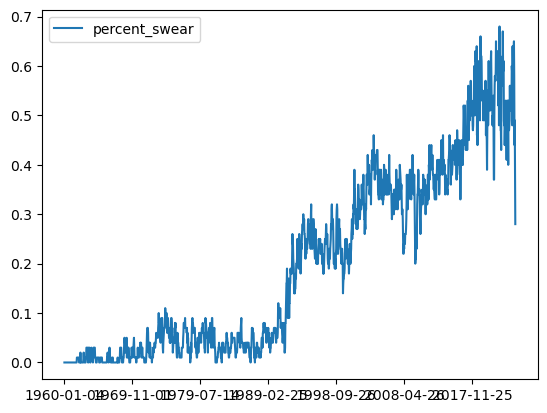

In [176]:
charts = pd.DataFrame(index = final['date'].unique())
charts['percent_swear'] = None

for idx, df in final.groupby("date"):
    charts.at[idx, 'percent_swear'] = round(sum(df['total_swear'] != 0)/len(df), 2)
    
charts.plot()

In [179]:
charts

,percent_swear
1960-01-04,0.0
1960-01-18,0.0
1960-02-01,0.0
1960-02-15,0.0
1960-02-29,0.0
...,...
2023-11-04,0.58
2023-11-18,0.44
2023-12-02,0.49
2023-12-16,0.4


In [182]:
import plotly.express as px

fig = px.line(x = charts.index, y = charts['percent_swear'], title='Percent of Songs on Charts With Swears')
fig.show()






In [196]:
(final['date'] == '1960-01-04').sum()

73

In [198]:
final['year'] = [d[:4] for d in final['date']]
final

C:\Users\gouth\AppData\Local\Temp\ipykernel_45780\3606324323.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,artist,rank,date,cleaned_lyrics,tokens,lowercased_tokens,filtered_tokens,without_stop,stemmed_tokens,...,motherfuck,goddamn,hell,nigga,nigger,pussy,shit,total_swear,percent_swear,year
0,What About Us,The Coasters,50,1960-01-04,he's got a house made of glass\ngot his own sw...,"[he, 's, got, a, house, made, of, glass, got, ...","[he, 's, got, a, house, made, of, glass, got, ...","[he, 's, got, a, house, made, of, glass, got, ...","['s, got, house, made, glass, got, swimming, p...","['s, got, hous, made, glass, got, swim, pool, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960
1,Swingin' On A Rainbow,Frankie Avalon,39,1960-01-04,you've got me swinginon a rainbow\nwalkinaroun...,"[you, 've, got, me, swinginon, a, rainbow, wal...","[you, 've, got, me, swinginon, a, rainbow, wal...","[you, 've, got, me, swinginon, a, rainbow, wal...","['ve, got, swinginon, rainbow, walkinaround, r...","['ve, got, swinginon, rainbow, walkinaround, r...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960
2,Misty,Johnny Mathis,40,1960-01-04,look at me\ni'm as helpless as a kitten up a t...,"[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, at, me, i, 'm, as, helpless, as, a, kit...","[look, 'm, helpless, kitten, tree, feel, like,...","[look, 'm, helpless, kitten, tree, feel, like,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960
3,He'll Have To Go,Jim Reeves,41,1960-01-04,put your sweet lips a little closer to the pho...,"[put, your, sweet, lips, a, little, closer, to...","[put, your, sweet, lips, a, little, closer, to...","[put, your, sweet, lips, a, little, closer, to...","[put, sweet, lips, little, closer, phone, let,...","[put, sweet, lip, littl, closer, phone, let, '...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960
4,Believe Me,Royal Teens,42,1960-01-04,each night as i go wandering\ndown the street ...,"[each, night, as, i, go, wandering, down, the,...","[each, night, as, i, go, wandering, down, the,...","[each, night, as, i, go, wandering, down, the,...","[night, go, wandering, street, tears, think, l...","[night, go, wander, street, tear, think, love,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165988,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,28,2023-12-30,rotgut whiskey's gonna ease my mind\nbeach tow...,"[rotgut, whiskey, 's, gon, na, ease, my, mind,...","[rotgut, whiskey, 's, gon, na, ease, my, mind,...","[rotgut, whiskey, 's, gon, na, ease, my, mind,...","[rotgut, whiskey, 's, gon, na, ease, mind, bea...","[rotgut, whiskey, 's, gon, na, eas, mind, beac...",...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.005714,2023
165989,Run Rudolph Run,Chuck Berry,27,2023-12-30,out of all the reindeers\nyou know you're the ...,"[out, of, all, the, reindeers, you, know, you,...","[out, of, all, the, reindeers, you, know, you,...","[out, of, all, the, reindeers, you, know, you,...","[reindeers, know, 're, mastermind, run, run, r...","[reindeer, know, 're, mastermind, run, run, ru...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
165990,It's Beginning To Look A Lot Like Christmas,Michael Buble,24,2023-12-30,it's beginning to look a lot like christmas\ne...,"[it, 's, beginning, to, look, a, lot, like, ch...","[it, 's, beginning, to, look, a, lot, like, ch...","[it, 's, beginning, to, look, a, lot, like, ch...","['s, beginning, look, lot, like, christmas, ev...","['s, begin, look, lot, like, christma, everywh...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
165991,Last Christmas,Wham!,4,2023-12-30,(happy christmas)\nah-ah\nooh-woah\noh-oh\nlas...,"[(, happy, christmas, ), ah-ah, ooh-woah, oh-o...","[(, happy, christmas, ), ah-ah, ooh-woah, oh-o...","[happy, christmas, ah-ah, ooh-woah, oh-oh, las...","[happy, christmas, ah-ah, ooh-woah, oh-oh, las...","[happi, christma, ah-ah, ooh-woah, oh-oh, last...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023


In [205]:
final[final['date'] == '2004-01-10'].sort_values(by = 'total_swear', ascending = False)[:10]

,title,artist,rank,date,cleaned_lyrics,tokens,lowercased_tokens,filtered_tokens,without_stop,stemmed_tokens,...,motherfuck,goddamn,hell,nigga,nigger,pussy,shit,total_swear,percent_swear,year
113882,Get Low,Lil Jon & The East Side Boyz Featuring Ying Ya...,13,2004-01-10,[chorus: kaine\nd-roc\nkaine & lil jon]\n3-6-9...,"[[, chorus, :, kaine, d-roc, kaine, &, lil, jo...","[[, chorus, :, kaine, d-roc, kaine, &, lil, jo...","[chorus, kaine, d-roc, kaine, lil, jon, 3-6-9,...","[chorus, kaine, d-roc, kaine, lil, jon, 3-6-9,...","[choru, kain, d-roc, kain, lil, jon, 3-6-9, da...",...,21.0,20.0,0.0,3.0,0.0,2.0,1.0,78.0,0.066838,2004
113870,Damn!,YoungBloodZ Featuring Lil Jon,15,2004-01-10,ok\r\nthis sean paul\nliljohn\nj-bo\nyoungbloo...,"[ok, this, sean, paul, liljohn, j-bo, youngblo...","[ok, this, sean, paul, liljohn, j-bo, youngblo...","[ok, this, sean, paul, liljohn, j-bo, youngblo...","[ok, sean, paul, liljohn, j-bo, youngbloodz, a...","[ok, sean, paul, liljohn, j-bo, youngbloodz, a...",...,2.0,0.0,0.0,3.0,0.0,0.0,32.0,71.0,0.076262,2004
113844,Neva Eva,Trillville,94,2004-01-10,what\nwhat?! you can't! you can't\nit's trillv...,"[what, what, ?, !, you, ca, n't, !, you, can't...","[what, what, ?, !, you, ca, n't, !, you, can't...","[what, what, you, ca, n't, you, can't, it, 's,...","[ca, n't, can't, 's, trillville, ho, lil, scra...","[ca, n't, can't, 's, trillvil, ho, lil, scrapp...",...,0.0,0.0,2.0,23.0,0.0,2.0,1.0,46.0,0.048472,2004
113803,Gangsta Nation,Westside Connection Featuring Nate Dogg,38,2004-01-10,consider this an invitation\nto my gangsta nat...,"[consider, this, an, invitation, to, my, gangs...","[consider, this, an, invitation, to, my, gangs...","[consider, this, an, invitation, to, my, gangs...","[consider, invitation, gangsta, nation, na, na...","[consid, invit, gangsta, nation, na, na, na, n...",...,1.0,0.0,0.0,10.0,0.0,2.0,8.0,42.0,0.046103,2004
113820,The Set Up,Obie Trice Featuring Nate Dogg,73,2004-01-10,bitch i see you\nbitch you know i know you\nye...,"[bitch, i, see, you, bitch, you, know, i, know...","[bitch, i, see, you, bitch, you, know, i, know...","[bitch, i, see, you, bitch, you, know, i, know...","[bitch, see, bitch, know, know, yeah, know, th...","[bitch, see, bitch, know, know, yeah, know, th...",...,0.0,0.0,1.0,13.0,0.0,0.0,3.0,40.0,0.062794,2004
113881,Salt Shaker,Ying Yang Twins Featuring Lil Jon & The East S...,26,2004-01-10,[chorus: kaine\nd-roc\nand lil jon]\nshawty cr...,"[[, chorus, :, kaine, d-roc, and, lil, jon, ],...","[[, chorus, :, kaine, d-roc, and, lil, jon, ],...","[chorus, kaine, d-roc, and, lil, jon, shawty, ...","[chorus, kaine, d-roc, lil, jon, shawty, crunk...","[choru, kain, d-roc, lil, jon, shawti, crunk, ...",...,3.0,0.0,0.0,3.0,0.0,1.0,6.0,29.0,0.03877,2004
113849,Splash Waterfalls,Ludacris,60,2004-01-10,ohhhh! ohhhh! ohhhh! say it (make love to me)\...,"[ohhhh, !, ohhhh, !, ohhhh, !, say, it, (, mak...","[ohhhh, !, ohhhh, !, ohhhh, !, say, it, (, mak...","[ohhhh, ohhhh, ohhhh, say, it, make, love, to,...","[ohhhh, ohhhh, ohhhh, say, make, love, ohhhh, ...","[ohhhh, ohhhh, ohhhh, say, make, love, ohhhh, ...",...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.0,0.025934,2004
113885,Holidae In,Chingy Featuring Ludacris & Snoop Dogg,16,2004-01-10,bomb ass pussy\nooh you got that bomb\nknow yo...,"[bomb, ass, pussy, ooh, you, got, that, bomb, ...","[bomb, ass, pussy, ooh, you, got, that, bomb, ...","[bomb, ass, pussy, ooh, you, got, that, bomb, ...","[bomb, ass, pussy, ooh, got, bomb, know, got, ...","[bomb, ass, pussi, ooh, got, bomb, know, got, ...",...,0.0,0.0,0.0,2.0,0.0,3.0,1.0,14.0,0.012647,2004
113847,Stand Up,Ludacris Featuring Shawnna,5,2004-01-10,stand up! (ah)\nstand up! (yeah)\nstand up! (a...,"[stand, up, !, (, ah, ), stand, up, !, (, yeah...","[stand, up, !, (, ah, ), stand, up, !, (, yeah...","[stand, up, ah, stand, up, yeah, stand, up, ah...","[stand, ah, stand, yeah, stand, ah, stand, uh,...","[stand, ah, stand, yeah, stand, ah, stand, uh,...",...,0.0,1.0,8.0,0.0,0.0,0.0,0.0,

### What percent of words are swear words?

<Axes: >

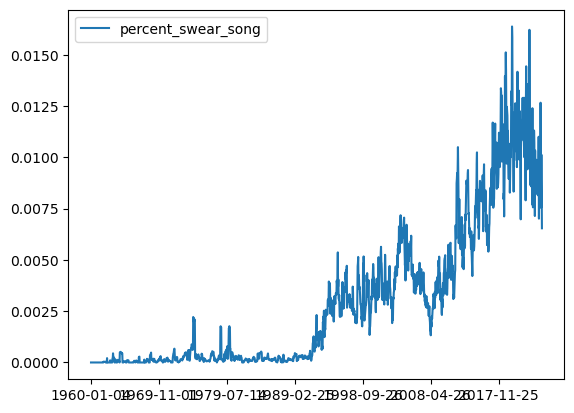

In [97]:
charts = pd.DataFrame(index = final['date'].unique())
charts['percent_swear_song'] = None

for idx, df in final.groupby("date"):
    charts.at[idx, 'percent_swear_song'] = df['percent_swear'].mean()
    
charts.plot()

### Does Rank Impact Swearing

<Axes: >

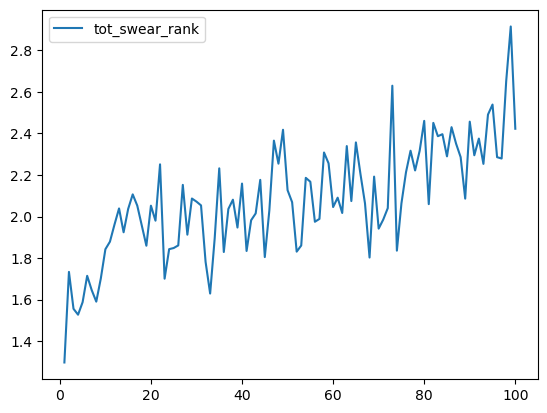

In [98]:
charts = pd.DataFrame(index = final['rank'].unique())
charts['tot_swear_rank'] = None

for idx, df in final.groupby("rank"):
    charts.at[idx, 'tot_swear_rank'] = df['total_swear'].mean()
    
charts.sort_index().plot()

<Axes: >

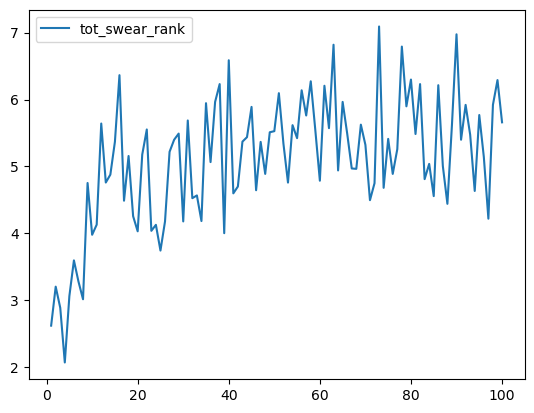

In [99]:
charts = pd.DataFrame(index = final['rank'].unique())
charts['tot_swear_rank'] = None

for idx, df in final[(final['date'] > '2010') & (final['date'] < '2020')].groupby("rank"):
    charts.at[idx, 'tot_swear_rank'] = df['total_swear'].mean()
    
charts.sort_index().plot()

<Axes: >

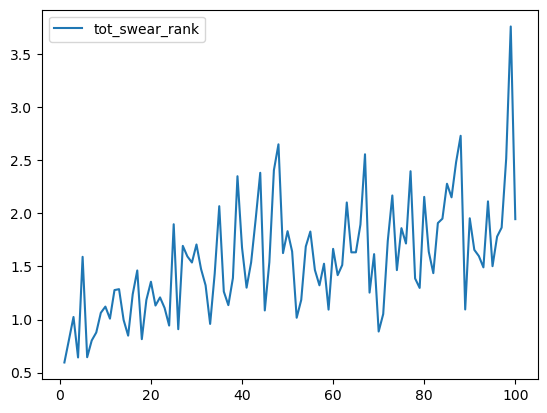

In [206]:
charts = pd.DataFrame(index = final['rank'].unique())
charts['tot_swear_rank'] = None

for idx, df in final[(final['date'] > '1990') & (final['date'] < '2000')].groupby("rank"):
    charts.at[idx, 'tot_swear_rank'] = df['total_swear'].mean()
    
charts.sort_index().plot()

In [112]:
final[final['date'] > '1980']

,title,artist,rank,date,cleaned_lyrics,tot_words,unique_words,percent_unique,length_words,anal,...,nigger,penis,pussy,slut,tit,tities,vagina,whore,total_swear,percent_swear
51293,I'd Rather Leave While I'm In Love,Rita Coolidge,38,1980-01-12,id rather leave while im in love\nwhile i stil...,170,67,0.394118,3.688235,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51294,Romeo's Tune,Steve Forbert,31,1980-01-12,meet me in the middle of the day\nlet me hear ...,298,115,0.385906,3.973154,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51296,Forever Mine,The O'Jays,37,1980-01-12,verse 1: walter williams]\nforever mine\nall b...,439,119,0.271071,3.731207,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51297,Savannah Nights,Tom Johnston,34,1980-01-12,well\nwhen the night falls\nway down in savann...,198,100,0.505051,4.121212,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51298,Take The Long Way Home,Supertramp,35,1980-01-12,so you think youre a romeo\nyoure playing a pa...,316,114,0.360759,3.832278,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165986,Santa Baby,Eartha Kitt With Henri Rene And His Orchestra,30,2023-12-30,santa baby\njust slip a sable under the tree\n...,205,100,0.487805,4.092683,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165987,Agora Hills,Doja Cat,29,2023-12-30,ooh\nyeah\nyeah\nkissin and hope they caught u...,695,218,0.313669,3.539568,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.01295
165988,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,28,2023-12-30,rotgut whiskeys gonna ease my mind\nbeach towe...,338,125,0.369822,4.073964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165989,Run Rudolph Run,Chuck Berry,27,2023-12-30,out of all the reindeers\nyou know youre the m...,206,77,0.373786,4.145631,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
charts.sort_index()[:15]

,tot_swear_rank
1,0.897208
2,1.234505
3,1.140755
4,1.082307
5,1.164516
6,1.147192
7,1.245637
8,1.17628
9,1.255375
10,1.391248


In [ ]:
### We can check what words come near the swear words